In [1]:
import matplotlib
import matplotlib.pyplot as plt
import preprocess as prep
from collections import Counter

## Grocery Store Transactions

In [2]:
file = './dataset/GroceryStore/Groceries.csv'
tras = prep.process_groceries(prep.read_csv(file))
item_counter = Counter()
for t in tras:
    item_counter += Counter(t)

items_freq = item_counter.most_common()
items = [pair[0] for pair in items_freq]
freq = [pair[1] for pair in items_freq]
print("items: ", len(items))

items:  169


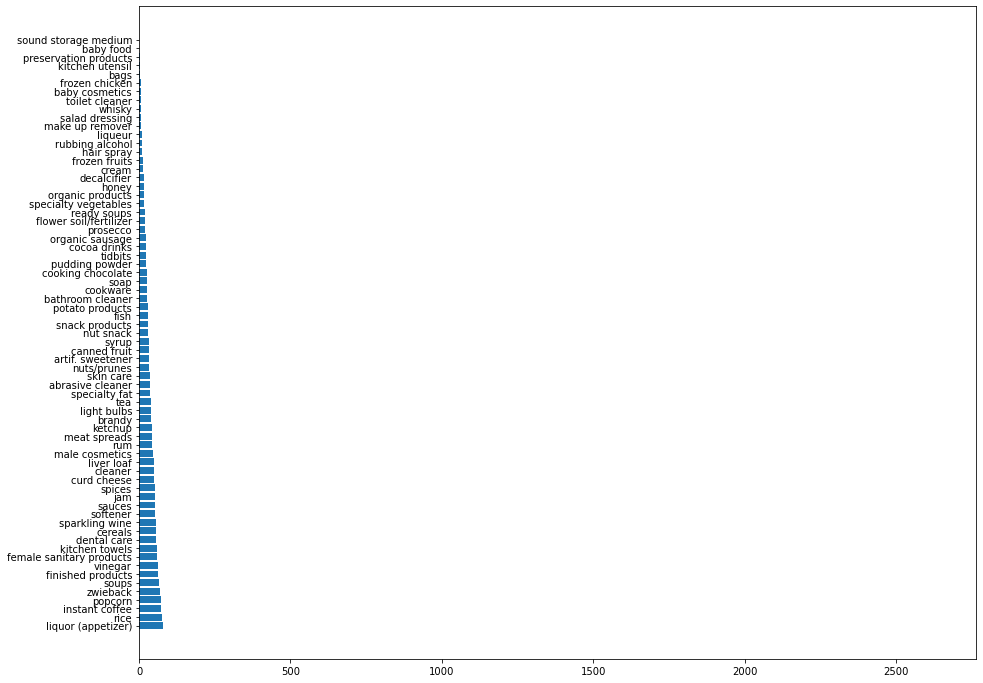

In [3]:
%matplotlib inline
max_f = max(freq)
plt.figure(figsize=(15, 12))
plt.xlim(0, int(max_f*1.1))
plt.barh(items[:50], freq[:50])
plt.savefig('imgs/0-49_item_freq.png')

plt.cla()
plt.xlim(0, int(max_f*1.1))
plt.barh(items[50:100], freq[50:100])
plt.savefig('imgs/50-99_item_freq.png')

plt.cla()
plt.xlim(0, int(max_f*1.1))
plt.barh(items[100:], freq[100:])
plt.savefig('imgs/100-{}_item_freq.png'.format(len(items)))

## UNIX Usage Cmds

In [5]:
file_fmt = './dataset/UNIX_usage/USER{}/sanitized_all.981115184025'
files = [file_fmt.format(i) for i in range(9)]

cmds_cnts = []
for f in files:
    cmd_cnt = Counter()
    sess = prep.process_sessions(prep.read_sessions(f), cmd_only=True)
    for s in sess:
        cmd_cnt += Counter(s)
    cmds_cnts.append(cmd_cnt)

In [9]:
%matplotlib inline
for i in range(len(cmds_cnts)):
    print(len(cmds_cnts[i]))
    print(cmds_cnts[i].most_common(1))

141
[('exit', 432)]
239
[('cd', 354)]
227
[('emacs', 329)]
228
[('lo', 400)]
354
[('logout', 559)]
361
[('cd', 277)]
462
[('elm', 1231)]
347
[('z', 737)]
500
[('z', 1173)]
